# Classifying movie reviews:
## a binary classification example

IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

### Why use separate training and test sets?

In [26]:
# The IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded

1) The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words)

2) train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [27]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [28]:
#Total number of reviews are 25000 with 10,000 frequently used words in dataset

len(train_data)

25000

In [29]:
#First Review 
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [30]:
#Number of words in first 3 reviews

print(len(train_data[0]))
print(len(train_data[1]))
print(len(train_data[2]))

218
189
141


In [31]:
#Index of words from 0 to 9999 => Which means 10000 words

max([max(sequence) for sequence in train_data])

9999

In [32]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [20]:
len(word_index)

88584

In [23]:
#Reverses it, mapping integer indices to words

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [25]:
#Decodes the review. 
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices 
# for “padding,” “start of sequence,” and “unknown.”

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

You can’t feed lists of integers into a neural network. You have to turn your lists into tensors.

In [33]:
# Encoding the integer sequences into a binary matrix => one-hot encoding
# One-hot encoding means to turn lists into vectors of 0s and 1s

In [34]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [35]:
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [36]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [38]:
# rows => number of reviews
# columns => number of frequently used words

x_train.shape

(25000, 10000)

In [39]:
# only those indices are ONES which are present in specific review, rest are ZEROS
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [40]:
# vectorize your labels, which is straightforward:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [41]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Now the data is ready to be fed into a neural network.

### Building your network

The input data is vectors, and the labels are scalars (1s and 0s):

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # Hidden Layer # 1
model.add(layers.Dense(16, activation='relu')) # Hidden Layers # 2
model.add(layers.Dense(1, activation='sigmoid')) # Output Layer

Commentory on Model

* Dense means stack of fully connected layers
* The argument being passed to each Dense layer (16) is the number of hidden units of the layer : Number of perceptron
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review
* The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation
* A relu (rectified linear unit) is a function meant to zero out negative values
* whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval outputting something that can be interpreted as a probability.

# Why ouput layer has 1 unit?

### Compiling the model

In [43]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Commentory : 

* It is binary classification problem and the output of your network is a probability
* Then is best to use binary_crossentropy loss.
* crossentropy is usually the best choice when you’re dealing with models that output probabilities
* metrics=['accuracy'] is the metric we want to measure as output

### Validating your approach

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [50]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [51]:
x_train.shape

(25000, 10000)

#### Setting aside a validation set

In [53]:
#top 10000 samples out of 25000
x_val = x_train[:10000]

In [54]:
x_val.shape

(10000, 10000)

In [55]:
# remaining samples out of 25000
partial_x_train = x_train[10000:]

In [56]:
partial_x_train.shape

(15000, 10000)

In [59]:
#labels

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

In [60]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,batch_size=512,
    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 13s 873us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 5s 312us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 5s 312us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 5s 312us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 5s 311us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 

Commentory : 

* 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
* Model is trained in mini-batches of 512 samples
* you’ll monitor loss and accuracy on the 10,000 samples that you set apart. 
* You do so by passing the validation data as the validation_data argument.
* Note that the call to model.fit() returns a History object

In [61]:
history

In [62]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [63]:
history_dict = history.history

In [64]:
history_dict

{'val_loss': [0.37968396944999694,
  0.30037296676635744,
  0.30853163027763364,
  0.28397763233184814,
  0.2841480770111084,
  0.3165846155166626,
  0.31267214293479917,
  0.3858804316043854,
  0.3634750815868378,
  0.3842569437980652,
  0.4152907837867737,
  0.4525300960540771,
  0.46982659120559694,
  0.5022469894886017,
  0.5340950439929962,
  0.5710443754196167,
  0.6024645493507386,
  0.6779953841209412,
  0.6691594786643982,
  0.6945034244537354],
 'val_acc': [0.8683999997138977,
  0.8897000004768372,
  0.8711000000953675,
  0.8832000001907349,
  0.8872000002861022,
  0.8771999998092651,
  0.8845999999046326,
  0.8648999997138977,
  0.8782000001907349,
  0.8792000001907349,
  0.8778999999046325,
  0.8689999998092651,
  0.8728999997138978,
  0.8725999996185303,
  0.8692999999046326,
  0.8697999996185303,
  0.8696999997138977,
  0.8632999995231628,
  0.8677999994277954,
  0.8656999996185303],
 'loss': [0.5084239959081014,
  0.30042938820521037,
  0.21790880835056306,
  0.175044464

In [65]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plotting the training and validation loss

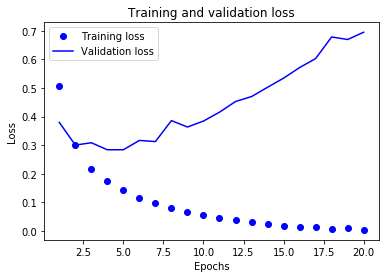

In [69]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

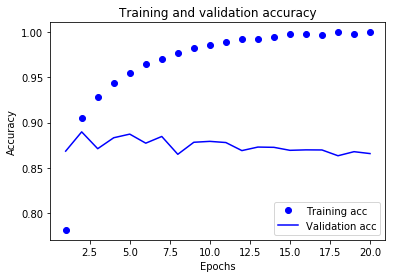

In [73]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Commentory:

* As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. 
* Hence this model performs better on the training data, but not on data it has never seen before. 
* In precise terms, what you’re seeing is overfitting:

### Solution of over-fitting? Wait for Chapter # 4

#### Using a trained network to generate predictions on new data

In [76]:
x_test.shape

(25000, 10000)

In [74]:
model.predict(x_test)

array([[0.00516665],
       [0.9999999 ],
       [0.90937436],
       ...,
       [0.00157753],
       [0.00553268],
       [0.4538138 ]], dtype=float32)

In [92]:
#prediction for First 3 samples

print(model.predict(x_test[0].reshape(10000,1).transpose()))
print(model.predict(x_test[1].reshape(10000,1).transpose()))
print(model.predict(x_test[2].reshape(10000,1).transpose()))

[[0.00516663]]
[[0.9999999]]
[[0.9093743]]
